## Smoking: Good or Bad? 

Let's have a go at a dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv("~/Downloads/smoking.csv")

Let's make sure that our dataset is clean before we analyse.

In [7]:
def clean_dataframe(dataf):
    return (dataf
             .assign(alive=lambda d: (d['outcome'] == 'Alive').astype(np.int))
             .assign(smokes=lambda d: (d['smoker'] == 'Yes').astype(np.int)))

clean_df = df.pipe(clean_dataframe)

Now that the dataset is clean, the analysis can begin!

In [8]:
(clean_df
  .groupby(['smokes'])
  .agg(prob=('alive', np.mean)))

,prob
smokes,
0,0.685792
1,0.761168


Let's see if we can explain this. 

### Effect of Age 

It seems age actually has a very large effect.

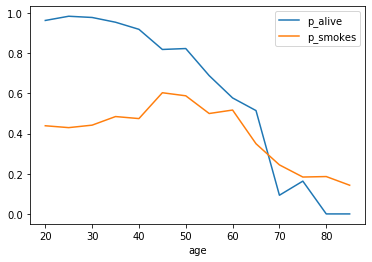

In [11]:
(clean_df
 .assign(r=1)
 .assign(age=lambda d: np.round(d['age'] / 5) * 5)
 .groupby(['age'])
 .agg(p_alive=('alive', np.mean), 
      p_smokes=('smokes', np.mean))
 .plot());

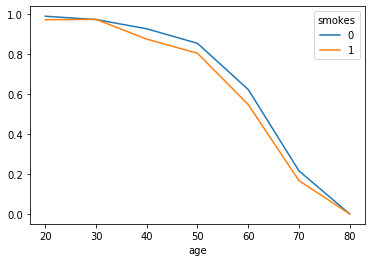

In [12]:
pivot_df = (clean_df
 .assign(age=lambda d: np.round(d['age'] / 10) * 10)
 .groupby(['smokes', 'age'])
 .agg(p=('alive', np.mean))
 .reset_index()
 .pivot(index='age', columns='smokes', values='p'))

pivot_df.plot();

So if we normalise against age, we might quantify the benefit of not smoking.

In [13]:
pivot_df.assign(diff=lambda d: d[0] - d[1])['diff'].mean()

0.03449607015272389

It seems that we get a +3.45% bonus to living longer if we do not smoke, but it should be said that this effect won't be noticable unless you are of old age. 

## Lesson 

You can get a substantially different conclusion to the same data if part of it is not taken into account. This is one of the things that makes working with data **super hard** to get right. Our saving grace here was critical thinking (always double-check). 

There are many aspects that we might also want to check; 

- do people stop smoking after a while, what is this effect? 
- is there a difference in your gender? 
- can we distinguish between heavy smokers and light ones?